# **Laboratorio 4** 
## Modelos de Classificación Lineal
### Modelos Generativos

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

#%% definición de funciones y sistemas a usar
def sistema1(means = None,Sigmas = None,N = None):
  """
    means: Lista de vectores 1-dimensionales (D,), o lista de listas de elementos, con las medias de cada clase.
    Sigma: Lista de matrices de covarianzas DxD, para cada una de las clases.
    N: lista de numeros de muestras por clase [N1,N2,...,Nk]
  """
  if (means is None) or (Sigmas is None):
    D = 2
  else:
    D = len(means)
  if means is None:
    means = [np.array([1,1]),np.array([3,3])]
  if Sigmas is None:
    Sigma1 = 0.2*np.eye(2)
    #np.array([[2,1],
             #         [1,2]])
    Sigma2 = 0.2*np.eye(2)#np.array([[1,0],[0,1]])
    Sigmas = [Sigma1,Sigma2]
  if N is None:
    N= [100,100]
  X = random.multivariate_normal(means[0],Sigmas[0],N[0])
  t = np.zeros((X.shape[0],1))
  for i in range(1,D):
    X = np.concatenate((X,random.multivariate_normal(means[i],Sigmas[i],N[i])),axis = 0)
    t = np.concatenate((t,i*np.ones((N[i],1))),axis = 0)
  return X,t

# funciones 
def croval_bal(t,p=0.7):
  """
    t: vector de etiquetas 
    p: proporcion de datos para entrenamiento
  """
  if not(p>0 and p<=1):
    print('p debe estar entre 0 y 1')
    return None
  labels = np.unique(t)
  nC = labels.size
  index = [np.where(t==labels[i])[0] for i in range(nC)]
  N = [index[i].size for i in range(nC)]
  for i in range(nC):
    ind = random.permutation(N[i])
    ind = index[i][ind[:int(p*N[i])]].reshape(-1,1)
    if i == 0:
      indices = ind
    else:
      indices = np.concatenate((indices,ind),axis=0)
  mask = False*np.ones((t.size,),dtype=bool)
  mask[indices] = True
  return mask

def sigmoidal(x):
  """
  calcula la funcion sigmoidal sobre x
  """
  return 1/(1 - np.exp(-x))


def target_2_1K(t):
  """
  Pasar de las etiquetas a la notacion 1-K
  """
  labels = np.unique(t) # Clases
  N = t.size
  K = labels.size # Número de Clases
  T = np.zeros((N,K))
  for i in range(N):
    for j in range(K):
      if t[i,0]==labels[j]:
        T[i,j] = 1
  return T
def unoK_2_target(T,labels):
  ind_max = np.argmax(T,axis = 1)
  t = np.zeros((T.shape[0],1))
  for i in range(t.size):
    t[i,0] = labels[ind_max[i]]
  return t


**En la siguiente celda se genera el sistema1 por default. Luego, se separa los datos de entrenamiento y de test. Por último, se grafica tanto datos de Train como de Test.**

X train: (140, 2) t train: (140, 1)
X test: (60, 2) t test: (60, 1)
Etiquetas:  [0. 1.]


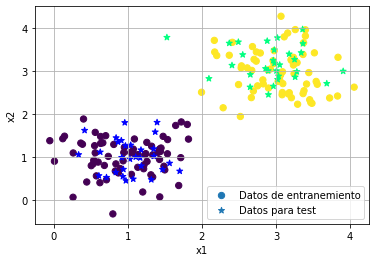

In [2]:
X,t = sistema1()

#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
print('X train:',Xtrain.shape,'t train:',tTrain.shape)
print('X test:',Xtest.shape,'t test:',tTest.shape)
print('Etiquetas: ',np.unique(t))
#%% Se grafica los datod de entrenamiento y los de test

plt.scatter(Xtrain[:,0].reshape(-1,1),Xtrain[:,1].reshape(-1,1),c=tTrain,s = 40,label='Datos de entranemiento')
plt.scatter(Xtest[:,0].reshape(-1,1),Xtest[:,1].reshape(-1,1),c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**A.** Con los datos de la matriz de datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo generativo por Máxima Verosimilitud. Calcule la medida de acierto (*accuracy*) sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$ . ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el acierto es coherente con los resultados gráficos?

70 140
mean 1 [3.02623517 3.04499384]
mean 2 [ 1.07141543 -0.47525786]
S1 [[ 0.08882007 -0.01041702]
 [-0.01041702  0.10548652]]
S2 [[0.21408304 0.03287829]
 [0.03287829 2.70483709]]
Pr1 0.3333333333333333
Pr2 0.6666666666666666
pX1 [2.42020142e-36 2.56554296e-29 2.62685493e-34 5.00905022e-25
 1.84546516e-11 5.39465643e-19 1.89152285e-21 1.91799908e-28
 8.05502199e-15 3.61383374e-24 5.62881684e-30 6.44601069e-30
 1.01194989e-16 1.21721122e-23 2.20527236e-17 3.62451704e-14
 4.77568887e-09 1.78424585e-16 5.24353286e-16 4.38013551e-24
 8.39049755e-21 1.31546477e-19 1.46048510e-23 3.58201981e-14
 3.59923644e-16 4.99006553e-14 4.86369841e-21 2.15691307e-33
 2.26317849e-25 3.12949040e-66 9.48191796e-87 5.23583780e-56
 3.86879161e-70 5.12689591e-68 2.28896594e-60 2.74342029e-61
 4.27100723e-68 2.62234315e-73 9.81748937e-51 3.87406620e-61
 4.90189236e-61 1.55363399e-52 3.71282208e-71 1.86198292e-81
 7.24707552e-77 1.55277922e-67 1.36869434e-85 1.72032336e-59
 2.58892816e-58 2.67719141e-78 1.00

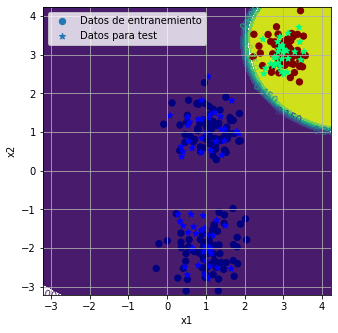

In [21]:
N,D = Xtrain.shape 

#%% Su código
N1 = np.sum(tTrain == 1)
N2 = np.sum(tTrain == 0)
print(N1,N2)
# calcule las medias de cada clase por verosimilitud
ind1 = np.where(tTrain==1)[0]
ind2 = np.where(tTrain==0)[0]

# Get mean Column
## [meanChar1, meanChar2]
m1=Xtrain[ind1].mean(axis=0)
m2=Xtrain[ind2].mean(axis=0)

print("mean 1 {}".format(m1))
print("mean 2 {}".format(m2))

# calcule las matriz de covarianza de cada clase
## Covar by Column - Features
## S1 != S2 forma una 'curva' en la clasificación
## Separación no-lineal
S1=np.cov(Xtrain[ind1,:], rowvar=False)
S2=np.cov(Xtrain[ind2,:],rowvar=False)

##S2=S1 realiza una linea recta
#S2=S1


print("S1 {}".format(S1))
print("S2 {}".format(S2))


# calpule los priors
## N1, N2
Pr1=N1/(N)
# Pr2=1-Pr1
Pr2=N2/(N)

print("Pr1 {}".format(Pr1))
print("Pr2 {}".format(Pr2))

# Calcule p(Xtest|C1) scipy.stats.multivariate_normal.pdf
from scipy.stats import multivariate_normal

pX1=multivariate_normal.pdf(Xtest, m1, S1)

pX2=multivariate_normal.pdf(Xtest, m2, S2)

print("pX1 {}".format(pX1))
print("pX2 {}".format(pX2))

# Calcule a


a=np.log((pX1*Pr1)/(pX2*Pr2))

print("a {}".format(a))

#Calcule el posterior de cada clase
from scipy.special import expit as sigmoid

# Probabildiad de pertenecer a la clase 1
# dado Xtest
# p(C1|Xtest)
pos1=sigmoid(a)

# Probabildiad de pertenecer a la clase 2
# dado Xtest
# p(C2|Xtest)
pos2=1-pos1

# Probabilidad de pertenecer a la clase 1 dado

print("posterior 1 {}".format(pos1))
print("posterior 2 {}".format(pos2))


# calcule t_new o t_est de los muestras de entrada 

## Values for accuracy
t_new=np.zeros(Xtest.shape[0])

# Assign value 1 where pos1>pos2
t_new[pos1>pos2]=1

# Por número de aciertos
accuracy=(tTest==t_new.reshape(-1,1)).mean()

print("Accuracy {}".format(accuracy))


#%% Para graficar
min_x1 = np.min(X) - 0.1
#min_x2 = np.min(X[:,1]) - 0.1
max_x1 = np.max(X) + 0.1
#max_x2 = np.max(X[:,1]) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)

Cond1 = multivariate_normal.pdf(X_plot, mean=m1, cov=S1);
Cond2 = multivariate_normal.pdf(X_plot, mean=m2, cov=S2);
a = np.log((Cond1*Pr1)/(Cond2*Pr2))
pc1_plot = sigmoid(a)

#Fin de su código

fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
cnt = axes.contourf(x1,x2,pc1_plot.reshape(xx1.shape))
axes.clabel(cnt, inline=1, fontsize=10)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Respuestas A
## ¿Qué pueden observar del resultado? 
En el resultado obtenido se logra observar que las muestras son clasificadas de forma no-lineal, de acuerdo a los 2 conjuntos de datos
## ¿Separa bien las clases? 
Las clases estna bien separadas ya que a la forma de este sistema tiene en cuenta todos los cluster de datos
## ¿Es el acierto es coherente con los resultados gráficos?
El acierto que es el accuracy va a razón de lo bien clasificado, comparando como quedó clasificadot tTest con lso t_new cuales coinciden su clasificación divido el total (la media)

**A continuación se genera un nuevo sistema usando la función sistema1**

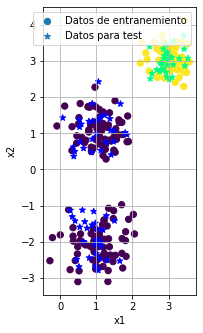

In [16]:
means = [[1,1],[1,-2],[3,3]]
Sigma0 = 0.2*np.eye(2)
Sigma1 = 0.2*np.eye(2)
Sigma2 = 0.1*np.eye(2)#np.array([[1,0],[0,1]])
Sigmas = [Sigma0,Sigma1,Sigma2]
X,t = sistema1(means,Sigmas,[100,100,100])
t[t==0] = 0
t[t==1] = 0
t[t==2] = 1
#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
#%% Se grafica los datos de entrenamiento y los de test
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.set_aspect('equal', 'box')
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento')
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
axes.legend()
axes.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

**B.** Con los la matriz de datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo generativo por Máxima Verosimilitud y calculen la medida de acierto, accuracy, sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$ . ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el resultado de accuracy coherente con los resultados gráficos?

70 140
mean 1 [3.02623517 3.04499384]
mean 2 [ 1.07141543 -0.47525786]
S1 [[ 0.08882007 -0.01041702]
 [-0.01041702  0.10548652]]
S2 [[ 0.08882007 -0.01041702]
 [-0.01041702  0.10548652]]
Pr1 0.3333333333333333
Pr2 0.6666666666666666
a [ -77.75963169  -58.94225214  -72.21143714  -52.29990289   14.32803477
  -34.37636488  -38.78084691  -60.68941726  -14.51516736  -46.97573625
  -62.67029519  -47.56339933  -25.33415573  -36.90771528  -23.25181504
  -14.07383203    8.28674491  -19.69178364  -23.2478569   -40.30997883
  -31.9531442   -29.17460204  -49.0727481   -17.55383357  -11.70401223
  -16.93721815  -40.22272797  -68.72223349  -44.33448785 -143.75481963
 -173.41463577 -124.94639251 -147.85109012 -144.66285767 -132.69781879
 -134.81591487 -145.43795849 -155.44837923 -113.16455578 -133.48373803
 -133.8781202  -118.00889614 -150.62079998 -167.46270765 -156.87399293
 -143.65297334 -172.0722793  -129.68997137 -128.68974757 -160.82183383
 -148.41173749 -183.73003435 -171.23730585 -139.5859478

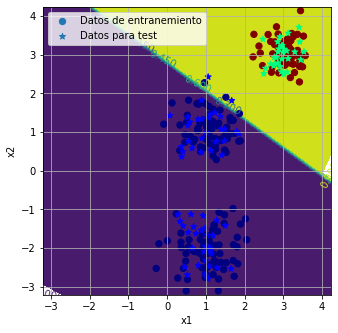

In [20]:
N,D = Xtrain.shape 

#%% Su código
N1 = np.sum(tTrain == 1)
N2 = np.sum(tTrain == 0)
print(N1,N2)
# calcule las medias de cada clase por verosimilitud
ind1 = np.where(tTrain==1)[0]
ind2 = np.where(tTrain==0)[0]

# Get mean Column
## [meanChar1, meanChar2]
m1=Xtrain[ind1].mean(axis=0)
m2=Xtrain[ind2].mean(axis=0)

print("mean 1 {}".format(m1))
print("mean 2 {}".format(m2))

# calcule las matriz de covarianza de cada clase
## Covar by Column - Features
## S1 != S2 forma una 'curva' en la clasificación
## Separación no-lineal
S1=np.cov(Xtrain[ind1,:], rowvar=False)
S2=np.cov(Xtrain[ind2,:],rowvar=False)

##S2=S1 realiza una linea recta
#S2=S1


print("S1 {}".format(S1))
print("S2 {}".format(S2))


# calpule los priors
## N1, N2
Pr1=N1/(N)
# Pr2=1-Pr1
Pr2=N2/(N)

print("Pr1 {}".format(Pr1))
print("Pr2 {}".format(Pr2))

# Calcule p(Xtest|C1)
from scipy.stats import multivariate_normal
pX1=multivariate_normal.pdf(Xtest, m1, S1)

pX2=multivariate_normal.pdf(Xtest, m2, S2)

# Calcule a
a=np.log((pX1*Pr1)/(pX2*Pr2))

print("a {}".format(a))

#Calcule el posterior de cada clase
from scipy.special import expit as sigmoid
# Probabildiad de pertenecer a la clase 1
# dado Xtest
# p(C1|Xtest)
pos1=sigmoid(a)

# Probabildiad de pertenecer a la clase 2
# dado Xtest
# p(C2|Xtest)
pos2=1-pos1

# calcule t_new o t_est de los muestras de entrada
## Values for accuracy
t_new=np.zeros(Xtest.shape[0])

# Assign value 1 where pos1>pos2
t_new[pos1>pos2]=1

# Por número de aciertos
accuracy=(tTest==t_new.reshape(-1,1)).mean()

print("Accuracy {}".format(accuracy))


#%% Para graficar
min_x1 = np.min(X) - 0.1
#min_x2 = np.min(X[:,1]) - 0.1
max_x1 = np.max(X) + 0.1
#max_x2 = np.max(X[:,1]) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)

Cond1 = multivariate_normal.pdf(X_plot, mean=m1, cov=S1);
Cond2 = multivariate_normal.pdf(X_plot, mean=m2, cov=S2);
a = np.log((Cond1*Pr1)/(Cond2*Pr2))
pc1_plot = sigmoid(a)

#Fin de su código

fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
cnt = axes.contourf(x1,x2,pc1_plot.reshape(xx1.shape))
axes.clabel(cnt, inline=1, fontsize=10)
#axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
means = np.mean(X,axis=0)
#axes.quiver(means[0],means[1],W_ml[0],W_ml[1],color = 'red')
#axes.text(means[0]+0.2,means[1],'w')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Respuestas B
## ¿Qué pueden observar del resultado? 
En este resultado se logra observar una clasificación del tipo Lineal, sin embargo no esta tan bien separado
## ¿Separa bien las clases? 
Las clases no son bien clasificadas debido a que tiene mas en cuenta la covariancia de uno de los datos presentes en este caso de la clase 0 y por eso presenta problema
## ¿Es el resultado de accuracy coherente con los resultados gráficos?
El acuracy se ajusta a lo que resultó de la clasificación, aqui claramente se vió reducido y por ello se ha obtenido un valor inferior respecto al punto **A**

**Se genera una nueva versión de la base de datos anterior.**

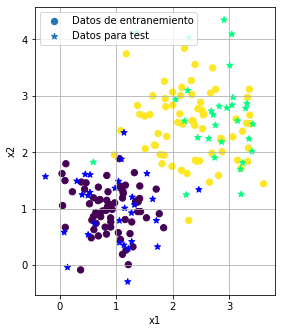

In [22]:
means = [[1,1],[2.5,2.5]]
Sigma0 = 0.2*np.eye(2)
Sigma1 = 0.4*np.eye(2)
Sigmas = [Sigma0,Sigma1]
X,t = sistema1(means,Sigmas,[100,100])
t[t==0] = 0
t[t==1] = 1
#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
#%% Se grafica los datos de entrenamiento y los de test
fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.set_aspect('equal', 'box')
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento')
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
axes.legend()
axes.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

**C.** Con la matriz de datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo generativo por Máxima Verosimilitud y calculen la medida de acierto, accuracy, sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$,  moviendo el prior $\pi \in \{0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99999\}$. ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el resultado de accuracy coherente con los resultados gráficos?

70 70
Accuracy 0.5


<ipython-input-23-0b0dd30264b7>:37: RuntimeWarning: divide by zero encountered in log
  a=np.log((pX1*Pr1)/(pX2*Pr2))
<ipython-input-23-0b0dd30264b7>:76: RuntimeWarning: divide by zero encountered in log
  a = np.log((Cond1_plot*Pr1)/(Cond2_plot*Pr2))


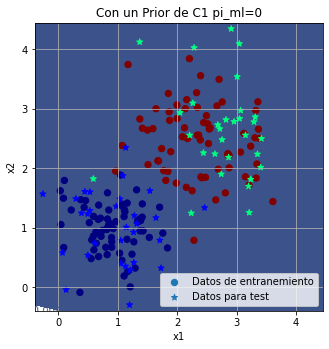

Accuracy 0.9333333333333333


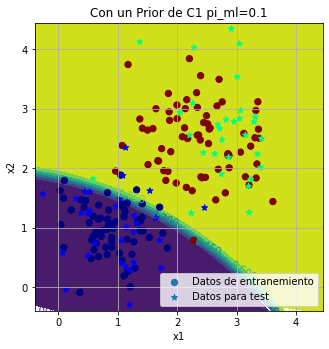

Accuracy 0.9333333333333333


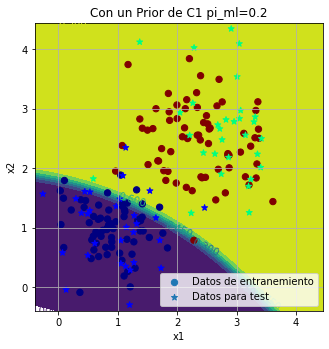

Accuracy 0.9166666666666666


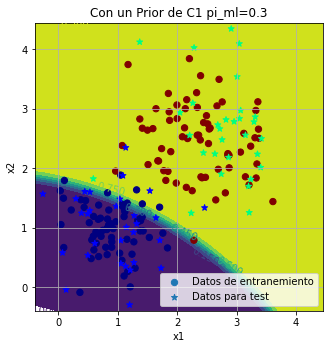

Accuracy 0.9


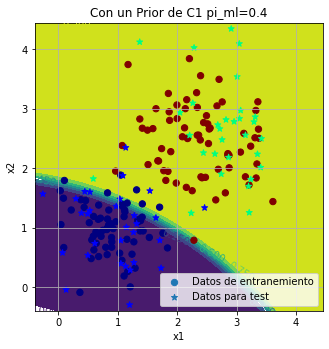

Accuracy 0.8833333333333333


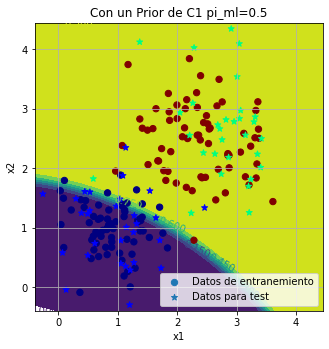

Accuracy 0.8666666666666667


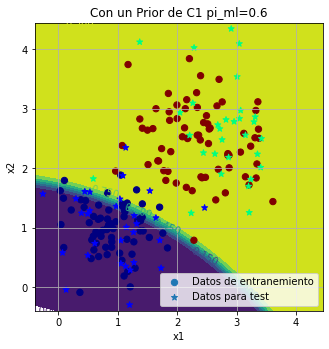

Accuracy 0.8666666666666667


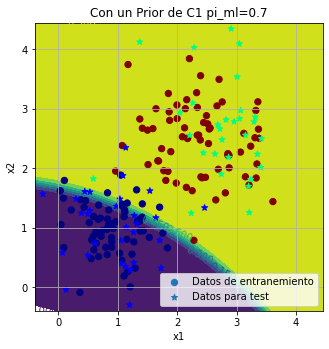

Accuracy 0.85


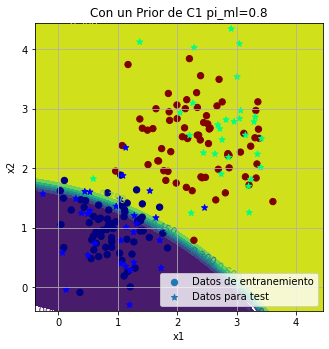

Accuracy 0.8333333333333334


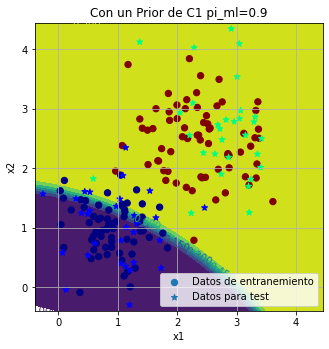

Accuracy 0.6666666666666666


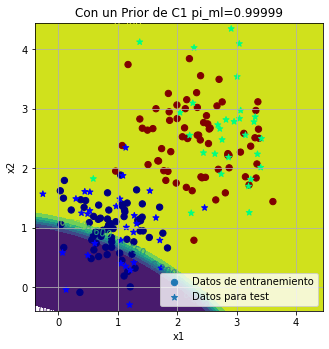

In [23]:
N,D = Xtrain.shape 

#%% Su código
N1 = np.sum(tTrain == 1)
N2 = np.sum(tTrain == 0)
print(N1,N2)
# calcule las medias de cada clase por verosimilitud
ind1 = np.where(tTrain==1)[0]
ind2 = np.where(tTrain==0)[0]


# calcule las matriz de covarianza de cada clase
## Covar by Column - Features
## S1 != S2 forma una 'curva' en la clasificación
## Separación no-lineal
S1=np.cov(Xtrain[ind1,:], rowvar=False)
S2=np.cov(Xtrain[ind2,:],rowvar=False)

##S2=S1 realiza una linea recta
#S2=S1



# Calcule p(Xtest|C1)
from scipy.stats import multivariate_normal
pX1=multivariate_normal.pdf(Xtest, m1, S1)

pX2=multivariate_normal.pdf(Xtest, m2, S2)


from scipy.special import expit as sigmoid
for pi_ml in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99999]:
    # calpule los priors
    Pr1=pi_ml
    Pr2=1-Pr1
    # Calcule a
    a=np.log((pX1*Pr1)/(pX2*Pr2))
    
    #Calcule el posterior de cada clase
    # Probabildiad de pertenecer a la clase 1
    # dado Xtest
    # p(C1|Xtest)
    pos1=sigmoid(a)

    # Probabildiad de pertenecer a la clase 2
    # dado Xtest
    # p(C2|Xtest)
    pos2=1-pos1
  
    # calcule t_new o t_est de los muestras de entrada
    ## Values for accuracy
    t_new=np.zeros(Xtest.shape[0])

    # Assign value 1 where pos1>pos2
    t_new[pos1>pos2]=1

    # Por número de aciertos
    accuracy=(tTest==t_new.reshape(-1,1)).mean()

    print("Accuracy {}".format(accuracy))


    #%% Para graficar
    min_x1 = np.min(X) - 0.1
    #min_x2 = np.min(X[:,1]) - 0.1
    max_x1 = np.max(X) + 0.1
    #max_x2 = np.max(X[:,1]) + 0.1
    x1 = np.arange(min_x1,max_x1,0.01)
    x2 = np.arange(min_x1,max_x1,0.01)
    xx1,xx2 = np.meshgrid(x1,x2)
    X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)

    Cond1_plot = multivariate_normal.pdf(X_plot, mean=m1, cov=S1);
    Cond2_plot = multivariate_normal.pdf(X_plot, mean=m2, cov=S2);
    a = np.log((Cond1_plot*Pr1)/(Cond2_plot*Pr2))
    pc1_plot = sigmoid(a)

    #Fin de su código

    fig = plt.figure()
    axes = fig.add_axes([1, 1, 1, 1])
    cnt = axes.contourf(x1,x2,pc1_plot.reshape(xx1.shape))
    axes.clabel(cnt, inline=1, fontsize=10)
    #axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
    axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
    axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
    means = np.mean(X,axis=0)
    #axes.quiver(means[0],means[1],W_ml[0],W_ml[1],color = 'red')
    #axes.text(means[0]+0.2,means[1],'w')
    plt.xlim([min_x1,max_x1])
    plt.ylim([min_x1,max_x1])
    axes.set_aspect('equal', 'box')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Con un Prior de C1 pi_ml='+str(pi_ml))
    plt.show()

# Respuestas C
## ¿Qué pueden observar del resultado? 
En estos resultados se logra contemplar que el prior cuando es 0 no logra clasificar y en las demas iteraciones va mejorando pero si aumenta demasiado el prior empieza a dar resultados de menor calidad
## ¿Separa bien las clases? 
Las clases se separan bien para volres de prior superior a 0, sin embargo en un punto intermedio fue mejor de hecho en un prior de 0.1 entregó mejor acuracy en una de las veces que se corrió el algoritmo
## ¿Es el resultado de accuracy coherente con los resultados gráficos?
En cada valor de prior da una accuracy bien a excepción cuando prior es 0 por loq eu se indetermina el calculo del logaritmo

**D**. Con la matriz de datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo Quadratic Discriminant Analysis (QDA), por medio de la libreria **scikit-learn** y calculen la medida de acierto, accuracy, sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$. ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el resultado de accuracy coherente con los resultados gráficos?. Teniendo en cuenta las clasificaciones lineales obtenidas, en este laboratorio y en el anterior, ¿Es mejor esta clasificación no-lineal?




c:\program files\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.95


c:\program files\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


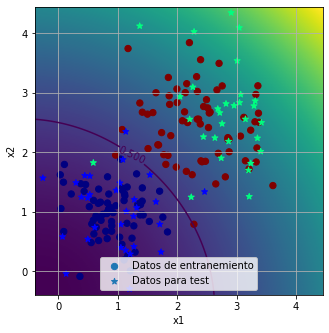

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
#%% Your code
t_new=qda.fit(Xtrain, tTrain).predict(Xtest)

#print("t_new {}".format(t_new))

# Por número de aciertos
accuracy=(tTest==t_new.reshape(-1,1)).mean()

print("Accuracy {}".format(accuracy))


#%% Para graficar
min_x1 = np.min(X) - 0.1
#min_x2 = np.min(X[:,1]) - 0.1
max_x1 = np.max(X) + 0.1
#max_x2 = np.max(X[:,1]) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
f_plot = qda.decision_function(X_plot).reshape(-1,1)

fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.scatter(X_plot[:,0],X_plot[:,1],c = f_plot,s = 40)
cnt = axes.contour(x1,x2,f_plot.reshape(xx1.shape),[0.5])
axes.clabel(cnt, inline=1, fontsize=10)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
means = np.mean(X,axis=0)
#axes.quiver(means[0],means[1],W_ml[0],W_ml[1],color = 'red')
#axes.text(means[0]+0.2,means[1],'w')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


# Respuestas D
## ¿Qué pueden observar del resultado? 
En los datos graficados se observa la linea que establece la separación de clases con buena precisión, sin embargo, peude variar a razón de los datos
## ¿Separa bien las clases? 
Las clases estan separadas bastante bien aun que para este caso presentó una presición del 95% lo cual es bastante bien

## ¿Es el resultado de accuracy coherente con los resultados gráficos?. 
Si el resultado es acorde a como resulto la clasificación, ya que esta función da uso de las etiqeutas por defecto desde 0 (tal como estna los datos ahora)


## Teniendo en cuenta las clasificaciones lineales obtenidas, en este laboratorio y en el anterior, ¿Es mejor esta clasificación no-lineal?
La clasificación no lineal se ajusta mejor a ciertos tipos de datos, en este caso respecto al laboratorio anterior ha entregado mejor precisión para clasificar los datos


**Acontinuación se genera un nuevo sistema apartir del sistema1**

Text(0, 0.5, 'x2')

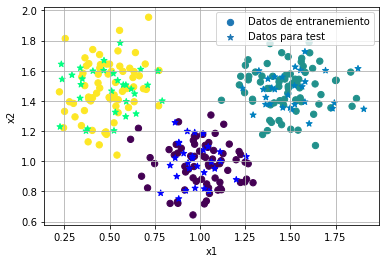

In [26]:
means = [[1,1],[1.5,1.5],[0.5,1.5]]
Sigma1 = 0.02*np.eye(2)
Sigma2 = 0.02*np.eye(2)#np.array([[1,0],[0,1]])
Sigma3 = 0.02*np.eye(2)
Sigmas = [Sigma1,Sigma2,Sigma3]

X,t = sistema1(means,Sigmas,[100,100,100])
#%% Separando conjunto de entrenamiento y de Test
ind = croval_bal(t)

Xtrain = X[ind,:]
tTrain = t[ind,:]
Xtest = X[~ind,:]
tTest = t[~ind,:]
#%% Se grafica los datod de entrenamiento y los de test

plt.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento')
plt.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')

**E.** Con los la matriz de datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo generativo por Máxima Verosimilitud para clasificación multiclase, y calculen la medida de acierto, accuracy, sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$ . ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el resultado de accuracy coherente con los resultados gráficos?

Nk: [70, 70, 70]
shape ak (90, 3)
t_new [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy 1.0


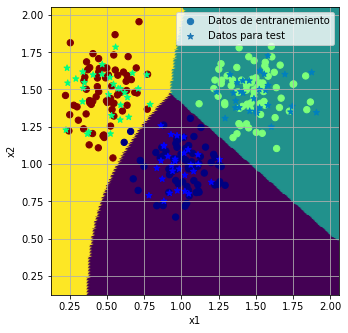

In [35]:
N,D = Xtrain.shape # # de datos de entrenamiento
labels = np.unique(tTrain) # vector con las etiquetas de las clases
K = labels.size # # de clases
inds = [np.where(tTrain==labels[k])[0] for k in range(K)] # lista con los indices de las muestras para cada clase
Nk = [inds[k].size for k in range(K)] # lista con los números de muestras por cada clase. 

#%% Su código
print('Nk:',Nk)
# calcule las medias de cada clase por verosimilitud
#ind1 = np.where(tTrain==2)[0]
#ind2 = np.where(tTrain==1)[0]
#ind3 = np.where(tTrain==0)[0]


# calcule las matriz de covarianza de cada clase
m1=Xtrain[inds[0]].mean(axis=0)
m2=Xtrain[inds[1]].mean(axis=0)
m3=Xtrain[inds[2]].mean(axis=0)

S1 = np.cov(Xtrain[inds[0], :], rowvar=False)
S2 = np.cov(Xtrain[inds[1], :], rowvar=False)
S3 = np.cov(Xtrain[inds[2], :], rowvar=False)


# calcule los priors
Pr1=Nk[0]/N
Pr2=Nk[1]/N
Pr3=Nk[2]/N

# Calcule p(Xtest|Ck)
from scipy.stats import multivariate_normal
cond1=multivariate_normal.pdf(Xtest, m1, S1)
cond2=multivariate_normal.pdf(Xtest, m2, S2)
cond3=multivariate_normal.pdf(Xtest, m3, S3)


# Calcule ak
a1 = np.log(cond1*Pr1).reshape(-1,1)
a2 = np.log(cond2*Pr2).reshape(-1,1)
a3 = np.log(cond3*Pr3).reshape(-1,1)

ak=np.concatenate((a1, a2, a3), axis=1)

print("shape ak {}".format(ak.shape))
#Calcule el posterior con softmax
from scipy.special import softmax
# Softmax obtiene la probabilidad 
# de todos los elementos por fila
posterior=softmax(ak, axis=1)

# calcule t_new o t_est de los muestras Xtest con el máximos posterior:

# Dado a que los clasificación son dadas 0, 1, 2
# index de columnas
t_new=np.argmax(posterior, axis=1)

print("t_new {}".format(t_new))

# Por número de aciertos
accuracy=(tTest==t_new.reshape(-1,1)).mean()

print("Accuracy {}".format(accuracy))

m=[m1,m2,m3]
S=[S1, S2, S3]

Pr=[Pr1, Pr2, Pr2]

#%% Para graficar
min_x1 = np.min(X) - 0.1
#min_x2 = np.min(X[:,1]) - 0.1
max_x1 = np.max(X) + 0.1
#max_x2 = np.max(X[:,1]) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
Cond = [multivariate_normal.pdf(X_plot, mean=m[k], cov=S[k]) for k in range(K) ]
a = [np.log(Cond[k]*Pr[k]) for k in range(K)]
a = np.array(a)
pc_plot = softmax(a,axis=0)
t_plot = np.argmax(pc_plot,axis=0).reshape(-1,1)
#Fin de su código

fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
means = np.mean(X,axis=0)
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Respuestas E
## ¿Qué pueden observar del resultado? 
En el resultado se logra observar 3 clases diferentes separados bastante bien
## ¿Separa bien las clases? 
Las clases estan bien seaprados correspondiente a su categoria

## ¿Es el resultado de accuracy coherente con los resultados gráficos?

El acuracy es a razón de sus etiquetas y presenta un valor acorde a lo visualizado

 **F.** Con los la matriz de datos de entrada $\{\boldsymbol{X}_{Train}\in R^{N\times2},\boldsymbol{t}_{Train}\in R^{N\times1}\}$, estime con estos datos de entrada el modelo Quadratic Discriminant Analysis (QDA), por medio de la libreria **scikit-learn** para clasificación multiclase y calculen la medida de acierto, accuracy, sobre las muestras de Test $\{\boldsymbol{X}_{Test}\in R^{N\times2},\boldsymbol{t}_{Test}\in R^{N\times1}\}$ . ¿Qué pueden observar del resultado? ¿Separa bien las clases? ¿Es el resultado de accuracy coherente con los resultados gráficos?

c:\program files\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 1.0


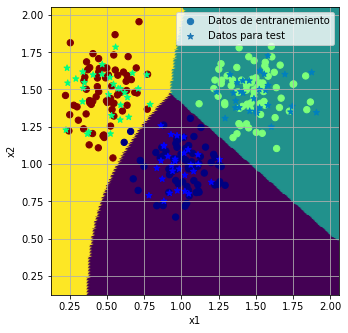

In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
#%% Your code
t_new=qda.fit(Xtrain, tTrain).predict(Xtest)

#print("t_new {}".format(t_new))

# Por número de aciertos
accuracy=(tTest==t_new.reshape(-1,1)).mean()

print("Accuracy {}".format(accuracy))


#%% Para graficar
min_x1 = np.min(X) - 0.1
#min_x2 = np.min(X[:,1]) - 0.1
max_x1 = np.max(X) + 0.1
#max_x2 = np.max(X[:,1]) + 0.1
x1 = np.arange(min_x1,max_x1,0.01)
x2 = np.arange(min_x1,max_x1,0.01)
xx1,xx2 = np.meshgrid(x1,x2)
X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
t_plot = qda.predict(X_plot).reshape(-1,1)

fig = plt.figure()
axes = fig.add_axes([1, 1, 1, 1])
axes.scatter(X_plot[:,0],X_plot[:,1],c = t_plot,s = 40)
axes.scatter(Xtrain[:,0],Xtrain[:,1],c=tTrain,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
axes.scatter(Xtest[:,0],Xtest[:,1],c=tTest+200,s = 40,marker='*',cmap=plt.cm.winter,label='Datos para test')
means = np.mean(X,axis=0)
#axes.quiver(means[0],means[1],W_ml[0],W_ml[1],color = 'red')
#axes.text(means[0]+0.2,means[1],'w')
plt.xlim([min_x1,max_x1])
plt.ylim([min_x1,max_x1])
axes.set_aspect('equal', 'box')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()



# Respuestas F
## ¿Qué pueden observar del resultado?
En este resultado se observa buena clasificación ecomo el punto **E** es decir que la función de scikit learn tambien es bastante apta para esto y es mas sencillo de utilizar pero solo si las etiquetas empiezan desde 0

## ¿Separa bien las clases?
Las clases son bien separadas ha encontrado 3, es factible que funcione bien para varias clases mas


## ¿Es el resultado de accuracy coherente con los resultados gráficos?

Si el accuracy va coherente a lo que está clasificado bien

**G.** Con una base de datos real, de su preferencia, aplicar los modelos clasificación implementados y vistos en los incisos anteriores. Pueden usar las librerias de **scikit-learn** para implementar esta. Se espera que usen algun esquema de validación cruzada, para el entrenamiento de estas y su evaluación. Además, deben de calcular las medidas de desempeño de Accuracy y media geometrica, si seles cruza alguna otra bienvenida es.

In [1]:
# Import pandas for dataset management PCA multy dimension
import pandas as pd
import numpy as np

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Replace All space in column headers
data.rename(columns=lambda name: name.replace(" ", "_"), inplace=True)
    
# get column headers such as [keyX1, keyX2, keyX3, ..., keyY]
# keyList=data.columns.values[int(sys.argv[2]):]
keyList=data.columns.values

# Show head and tail
#print(data["pH"].tail())
#1 - fixed_cidity
#2 - volatile_acidity
#3 - citric_acid
#4 - residual_sugar
#5 - chlorides
#6 - free_sulfur_dioxide
#7 - total_sulfur_dioxide
#8 - density *
#9 - pH *
#10 - sulphates
#11 - alcohol
print(data.head())

# Get xTrain and tTrain
first_half_data=data[:int(len(data)/2)]
second_half_data=data[int(len(data)/2):]

#print("data {}".format(first_half_data["pH"]))
xTrain=first_half_data["pH"].to_numpy().reshape(-1,1)

print("xTrain {}".format(xTrain))

tTrain=first_half_data["alcohol"].to_numpy().reshape(-1,1)

xTest=second_half_data["pH"].to_numpy().reshape(-1,1)
tTest=second_half_data["alcohol"].to_numpy().reshape(-1,1)





#trainingKeys=["fixed_acidity","volatile_acidity", "citric_acid"]
#to_predict="pH"
#trainingKeys=["alcohol", "residual_sugar", "citric_acid", "sulphates", "density", "total_sulfur_dioxide", "free_sulfur_dioxide", "chlorides", "volatile_acidity"]




   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 